In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(1228)
%matplotlib inline
import os

In [63]:
max_words = 3000

In [2]:
sorted(os.listdir('/home/marina/all/master/27_clustering'))

['.ipynb_checkpoints',
 'clustering_used.ipynb',
 'clusterized.csv',
 'lab1_clustering.ipynb',
 'more_clusters.csv',
 'shoes.csv']

In [32]:
os.path.abspath('.')

'/home/marina/all/ML_test'

In [3]:
data = pd.read_csv('/home/marina/all/master/27_clustering/more_clusters.csv') #, sep=';')

In [4]:
data.columns

Index(['Unnamed: 0', 'body', 'topic', 'descr', 'clusters', 'new_descr'], dtype='object')

In [5]:
data = data[['body', 'new_descr']]

In [9]:
data = data.rename(columns={'new_descr':'topic'})

In [10]:
data['body'].apply(len).describe()

count    20846.000000
mean       147.145639
std        205.133614
min          3.000000
25%         49.000000
50%         84.000000
75%        153.000000
max       2378.000000
Name: body, dtype: float64

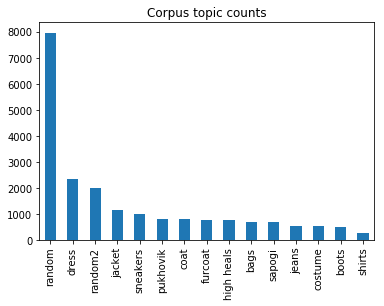

<Figure size 576x432 with 0 Axes>

In [11]:
plt.title("Corpus topic counts")
data.topic.value_counts().plot(kind='bar')
plt.figure(figsize=(8, 6))
plt.show()

In [59]:
data.head()

,body,category,topic
0,кроссовок niке аir мах черный красный мужской ...,odezhda_obuv_aksessuary,3
1,кроссовок аdidаs кроссовок аdidаs мужской крос...,odezhda_obuv_aksessuary,3
2,ботинок зимний nеw bаlаnсе мировой бестселлер ...,odezhda_obuv_aksessuary,3
3,джинсы lеvis w l джинсы lеvis w l меdiим джинс...,odezhda_obuv_aksessuary,4
4,рюкзак аdidаs сliмасооl редко пользоваться иде...,odezhda_obuv_aksessuary,4


In [12]:
data_sample = data

In [13]:
from gensim.corpora import *

In [14]:
texts = [data_sample.body.iloc[i].split() for i in range(len(data_sample))]
dictionary = Dictionary(texts)
#dictionary.filter_n_most_frequent(max_words)
corpus = [dictionary.doc2bow(text) for text in texts]

In [15]:
from gensim.models import *
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [16]:
from gensim.models import *
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [17]:
topics_number = len(data_sample.topic.value_counts())

In [18]:
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=topics_number)

In [19]:
X = [0] * len(data_sample)
Y = [0] * len(data_sample)
for i in range(len(data_sample)):
    vec = corpus[i]
    LSI_topics = (lsi[vec])
    try:
        for topic in LSI_topics:
            if topic[0] == 0:
                if topic[1] < 5:
                    X[i] = topic[1]
                else:
                    continue 
            elif topic[0] == 1:
                Y[i] = topic[1]
    except:
        pass
df = pd.DataFrame({'X': X, 'Y': Y, 'topic' : data_sample.topic})

In [20]:
df.head()

,X,Y,topic
0,0.862081,1.279309,sneakers
1,1.771325,2.654504,sneakers
2,0.611024,1.082544,random
3,1.425105,1.781960,random
4,0.267024,0.275741,random2


/home/marina/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


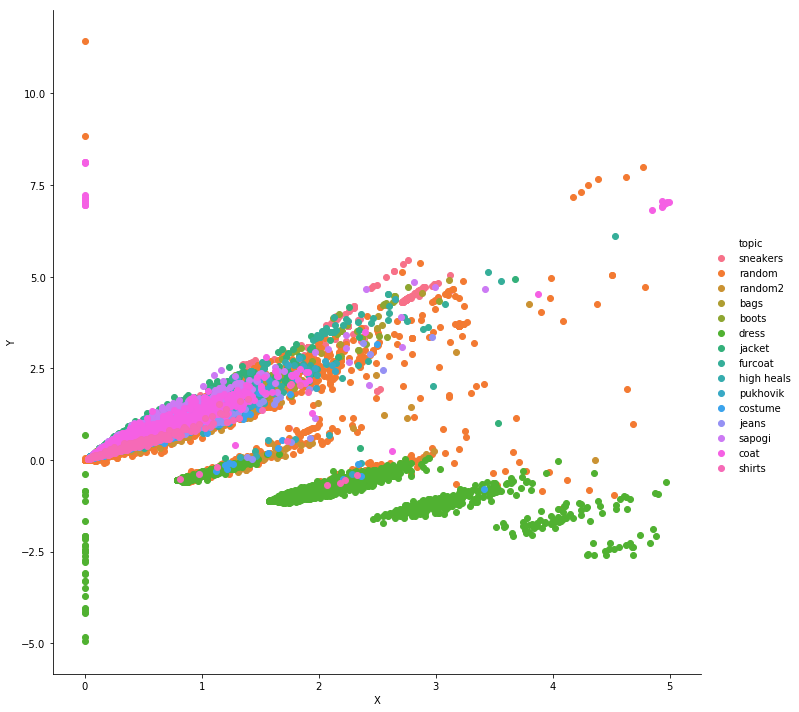

In [21]:
sns.FacetGrid(df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

# t-SNE

In [22]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(data_sample.body)
X_reduced = TruncatedSVD(n_components=100, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20846 samples in 0.071s...
[t-SNE] Computed neighbors for 20846 samples in 88.727s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20846
[t-SNE] Computed conditional probabilities for sample 2000 / 20846
[t-SNE] Computed conditional probabilities for sample 3000 / 20846
[t-SNE] Computed conditional probabilities for sample 4000 / 20846
[t-SNE] Computed conditional probabilities for sample 5000 / 20846
[t-SNE] Computed conditional probabilities for sample 6000 / 20846
[t-SNE] Computed conditional probabilities for sample 7000 / 20846
[t-SNE] Computed conditional probabilities for sample 8000 / 20846
[t-SNE] Computed conditional probabilities for sample 9000 / 20846
[t-SNE] Computed conditional probabilities for sample 10000 / 20846
[t-SNE] Computed conditional probabilities for sample 11000 / 20846
[t-SNE] Computed conditional probabilities for sample 12000 / 20846
[t-SNE] Computed conditional probabilities for s

In [29]:
data_sample_1 = pd.read_csv('/home/marina/all/master/27_clustering/more_clusters.csv')

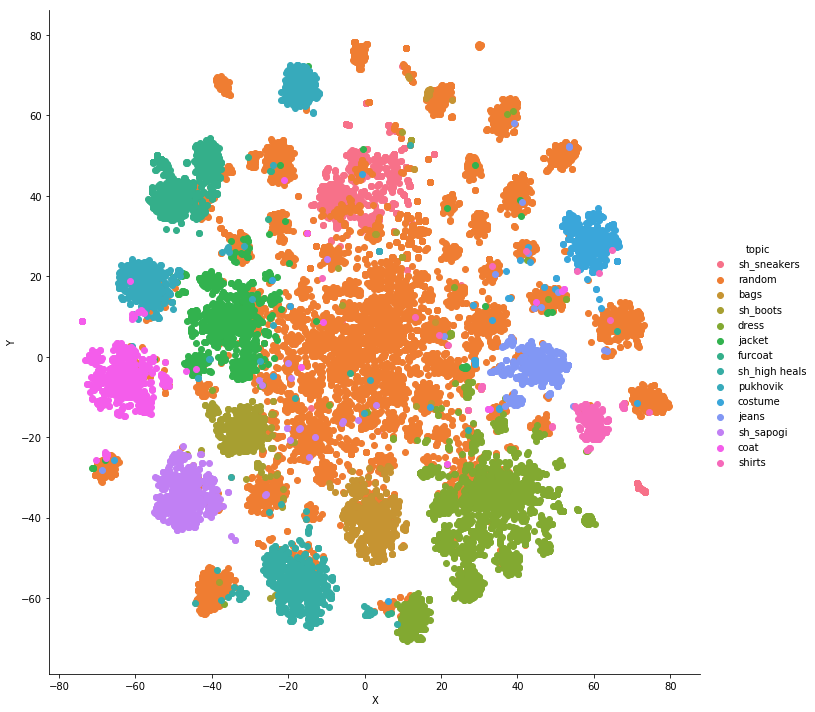

In [30]:
df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : data_sample_1.topic})
sns.FacetGrid(df, hue="topic", height=10).map(plt.scatter, "X", "Y").add_legend()

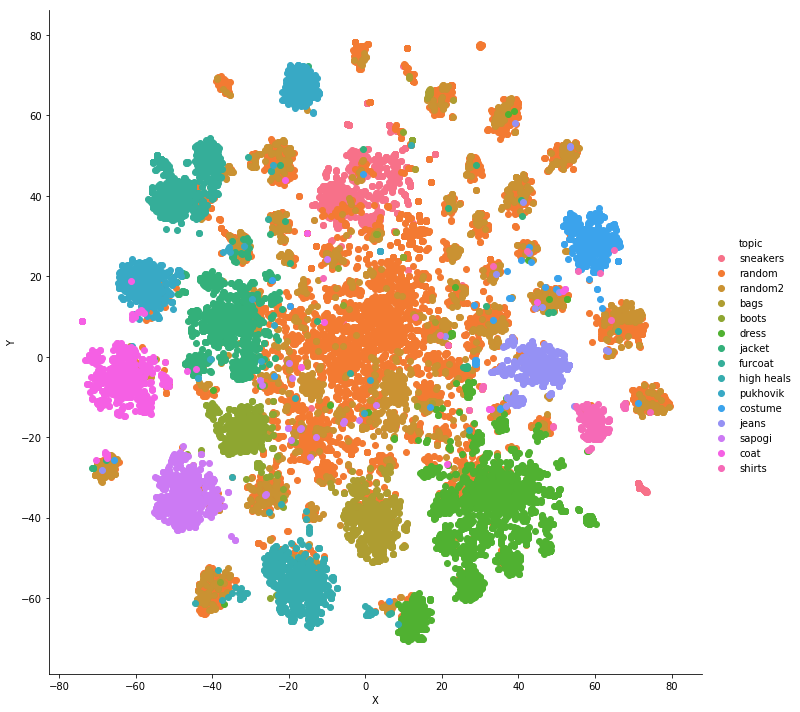

In [28]:
df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : data_sample.topic})
sns.FacetGrid(df, hue="topic", height=10).map(plt.scatter, "X", "Y").add_legend()

/home/marina/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


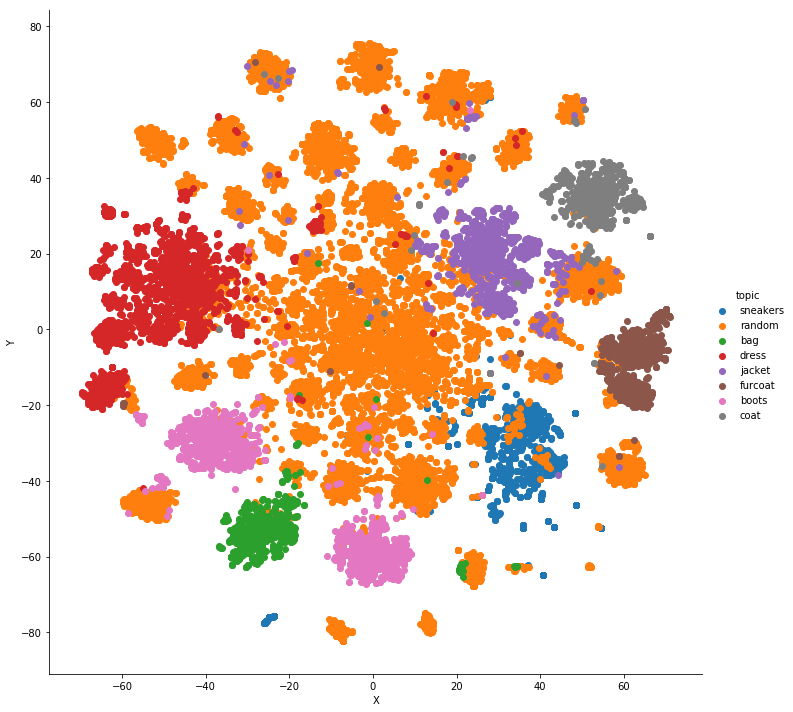

In [160]:
df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : data_sample.descr})
sns.FacetGrid(df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

## Автоэнкодер

cat_dict = {
    4: 'random',
1:'dress',
6:'boots',
3:'sneakers',
5:'jacket',
7:'coat',
0:'furcoat',
2: 'bag'
}